
# Shoes price prediction


# **Objective:**
Predicting shoes price for the customers of Zshoes and deploy with the help of flask.


# Problem Statement:
Zshoes.com is one of the famous shoe manufacturers of India and has business in
almost every country in Asia and Europe. They are one of the best choices of all the
athletics and they make the best shoes for running. Due to pandemic, they are facing a
loss as Zshoes are a bit expensive. They want to know the correct price of all types of
shoes that they are manufacturing so that they won’t face any loss and at the same
time customers also buy the shoes. As a machine learning engineer, we have to build a
shoe-price prediction app that can predict the correct shoe price by taking inputs like
freight_value,payment_type, etc.

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import seaborn as sb

In [96]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.tree import DecisionTreeRegressor

from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import LinearRegression

from xgboost import XGBRegressor

from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor

from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

from sklearn.model_selection import cross_val_score,KFold

from sklearn.model_selection import train_test_split

from statsmodels.stats.outliers_influence import variance_inflation_factor

from scipy.stats import zscore

import statsmodels.api as sm

from scipy import stats

from statsmodels.stats.stattools import durbin_watson

import statsmodels.stats.api as gq

from sklearn.metrics import mean_squared_error

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Reading Data

In [4]:
df=pd.read_csv('product_data.csv')
df.head()

,order_item_id,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,1,58.90,13.29,1,1,2,72.19
1,1,239.90,19.93,1,1,3,259.83
2,1,199.00,17.87,1,1,5,216.87
3,1,12.99,12.79,1,1,2,25.78
4,1,199.90,18.14,1,1,3,218.04


# Understanding of Data

In [5]:
df.describe()

,order_item_id,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
count,101335.000000,101335.000000,101335.000000,101335.000000,101335.000000,101335.000000,101335.000000
mean,1.205280,79.818332,16.126716,1.089495,1.352040,2.671703,124.124508
std,0.715244,56.057932,5.943237,0.689100,0.652362,2.524321,124.418064
min,1.000000,0.850000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,35.990000,12.690000,1.000000,1.000000,1.000000,55.550000
50%,1.000000,63.900000,15.470000,1.000000,1.000000,1.000000,95.400000
75%,1.000000,109.900000,18.670000,1.000000,2.000000,3.000000,155.840000
max,21.000000,270.000000,36.000000,26.000000,4.000000,24.000000,3195.730000


**We can see count,mean,std,min,max and 3 quartile values for each feature.**

**Price starts from 0.85 and Freight value starts from 0 which can mean than there is no frieght value for certain goods.
and also payment value also starts from 0**

**We can see that highest  price is 270 and payment value is 3195 as payment installments also is higher**

In [6]:
df.columns

Index(['order_item_id', 'price', 'freight_value', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value'],
      dtype='object')

In [7]:
df.shape

(101335, 7)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101335 entries, 0 to 101334
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_item_id         101335 non-null  int64  
 1   price                 101335 non-null  float64
 2   freight_value         101335 non-null  float64
 3   payment_sequential    101335 non-null  int64  
 4   payment_type          101335 non-null  int64  
 5   payment_installments  101335 non-null  int64  
 6   payment_value         101335 non-null  float64
dtypes: float64(3), int64(4)
memory usage: 5.4 MB


**As we can see there are no null values in the data**

**We can consider numeric features to be Order_item_id,freight_value and payment_value**

**Other features are encoded categorical features.**

**Price is also numeric and it is the target column**

In [9]:
#ID is an unnecessary column

In [10]:
df['order_item_id'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21], dtype=int64)

**INSIGNIFICANT COLUMNS**

In [11]:
#Removing

df=df.drop('order_item_id',axis=1)

***As target column is numeric and according to our problem statement we are going to do
regression analysis***

# EDA

***UNIVARIATE ANALYSIS***

In [12]:
for i in df.columns:
    print(i,end=' ')
    print(df[i].nunique())

price 4188
freight_value 3267
payment_sequential 26
payment_type 4
payment_installments 24
payment_value 21231


In [13]:
df.payment_type.value_counts()

1    74164
2    20170
3     5499
4     1502
Name: payment_type, dtype: int64

<AxesSubplot:xlabel='freight_value'>

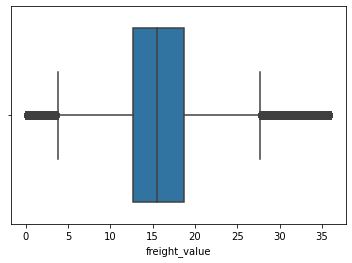

In [14]:
sb.boxplot(df['freight_value'])

<AxesSubplot:xlabel='payment_value'>

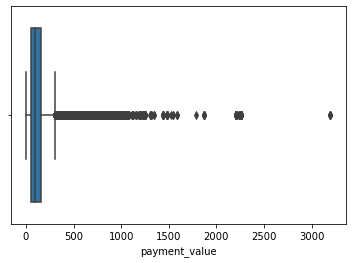

In [15]:
sb.boxplot(df['payment_value'])

In [16]:
#For these numerical columns we have noticed that there are extreme outliers present in the data.
#We should treat this using any of the outliers removal / capping method.

<AxesSubplot:xlabel='freight_value', ylabel='Density'>

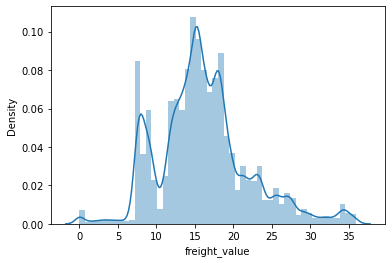

In [17]:
sb.distplot(df['freight_value'])

<AxesSubplot:xlabel='payment_value', ylabel='Density'>

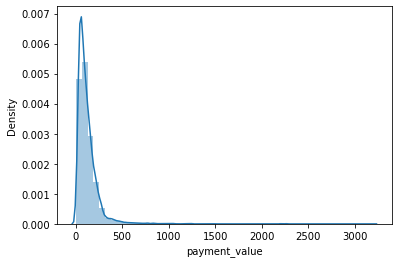

In [18]:
sb.distplot(df['payment_value'])

In [19]:
#We can observe payment_value column has heavily right skewed data

#And very negligible amount of skewness in Freight_value

In [20]:
#Target Feature

<AxesSubplot:xlabel='price', ylabel='Density'>

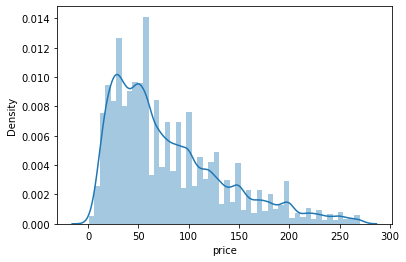

In [21]:
sb.distplot(df['price'])

<AxesSubplot:xlabel='price'>

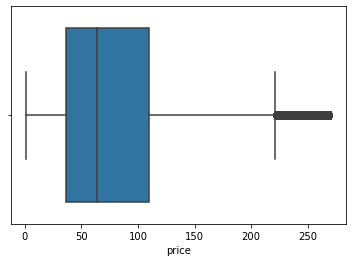

In [22]:
sb.boxplot(df['price'])

**As we can notice the data is right skewed and so we can notice that it has outliers**

In [23]:
df.columns

Index(['price', 'freight_value', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')

In [24]:
df['payment_installments'].value_counts()

1     53326
2     12475
3     10340
4      6816
5      4943
10     4121
6      3577
8      3400
7      1482
9       573
12      106
15       53
11       24
18       23
24       19
13       16
14       13
16        6
17        6
20        6
21        5
0         3
23        1
22        1
Name: payment_installments, dtype: int64

<AxesSubplot:xlabel='payment_installments', ylabel='count'>

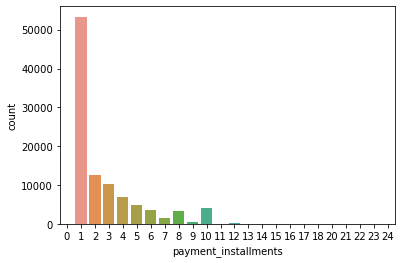

In [25]:
sb.countplot(df['payment_installments'])

In [26]:
df['payment_sequential'].value_counts()

1     97070
2      2856
3       563
4       271
5       153
6       103
7        70
8        48
9        39
10       33
11       28
12       21
13       13
14       10
15        9
16        8
17        8
18        8
19        8
20        5
21        5
22        2
25        1
23        1
24        1
26        1
Name: payment_sequential, dtype: int64

<AxesSubplot:xlabel='payment_sequential', ylabel='count'>

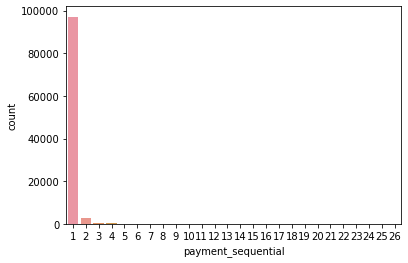

In [27]:
sb.countplot(df['payment_sequential'])

<AxesSubplot:xlabel='payment_type', ylabel='count'>

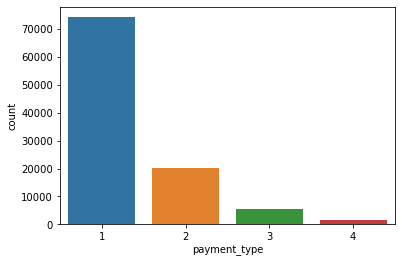

In [28]:
sb.countplot(df.payment_type)

**We can observe each categorical variable having many categories**


**In payment installments, Out of all 24 categories 7 categories have very 
  low count.**
 
 
**In payment sequential, Out of all 26 categories 12 categories have very low count**


**In payment type, Only the last category has less count.**

***BIVARIATE ANALYSIS***

In [29]:
df.columns

Index(['price', 'freight_value', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')

***Numerical Features with Target***

<AxesSubplot:xlabel='price', ylabel='freight_value'>

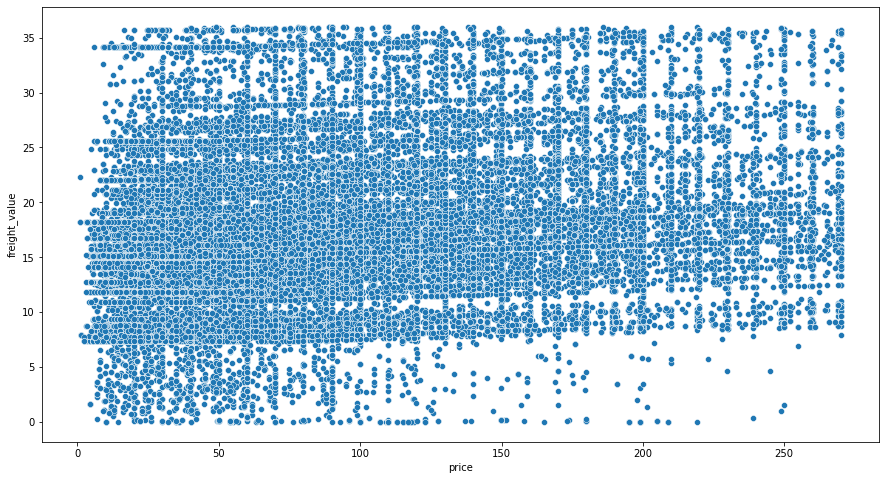

In [30]:
mp.figure(figsize=(15,8))
sb.scatterplot(df['price'],df['freight_value'])

<AxesSubplot:xlabel='price', ylabel='payment_value'>

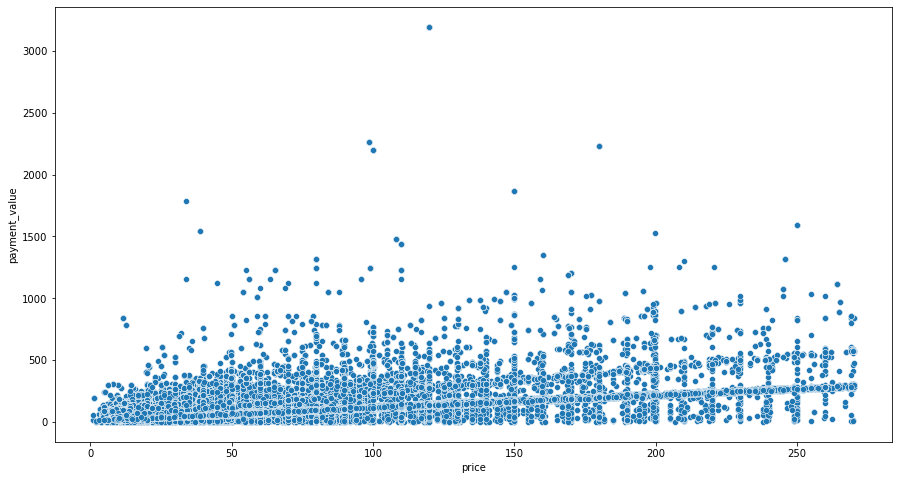

In [31]:
mp.figure(figsize=(15,8))
sb.scatterplot(df['price'],df['payment_value'])

In [32]:
#We can notice that there is more chance that for any price there can be any freight value.This #states there is no relation

#And for any price between 0-300, the payment value will be in mostly between 0 to 1000.

***Relation between Categorical Features***

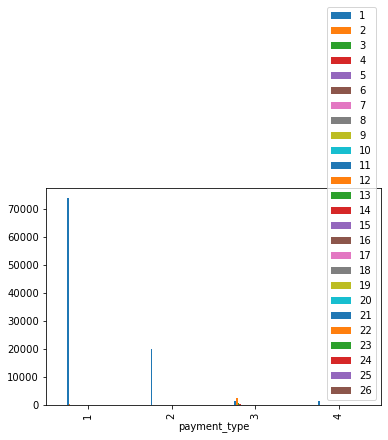

In [33]:
pd.crosstab(df['payment_type'],df['payment_sequential']).plot(kind='bar') 
mp.legend()

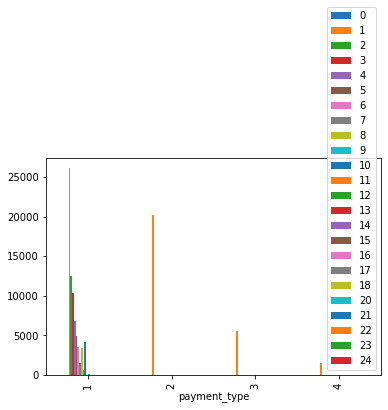

In [34]:
pd.crosstab(df['payment_type'],df['payment_installments']).plot(kind='bar') 
mp.legend()

<AxesSubplot:xlabel='payment_sequential', ylabel='payment_installments'>

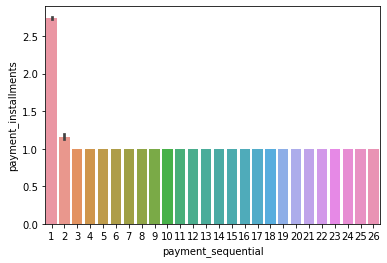

In [35]:
sb.barplot(df['payment_sequential'],df['payment_installments'])

***Categorical with Target***

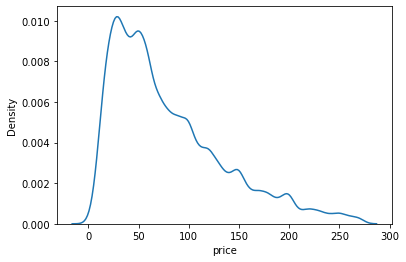

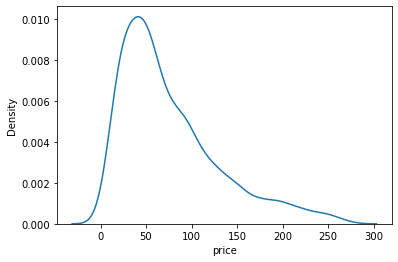

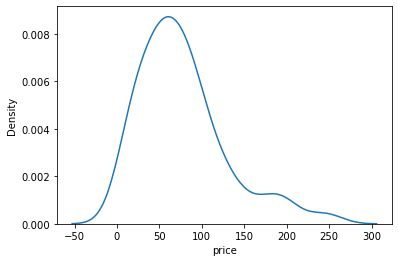

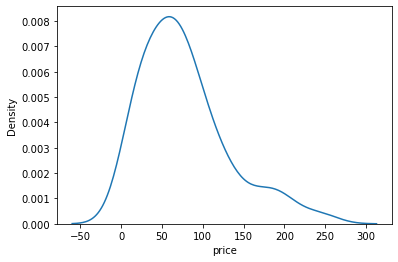

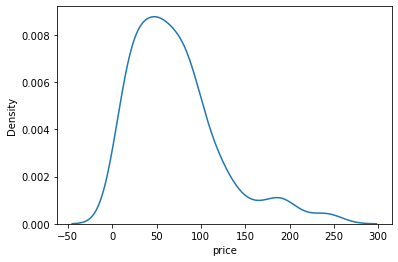

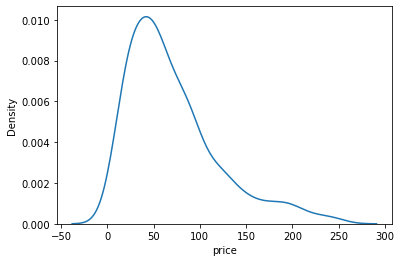

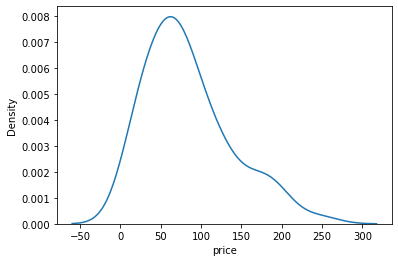

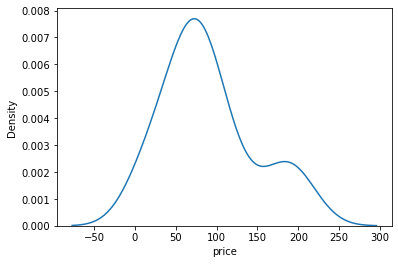

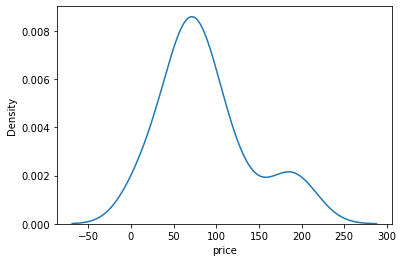

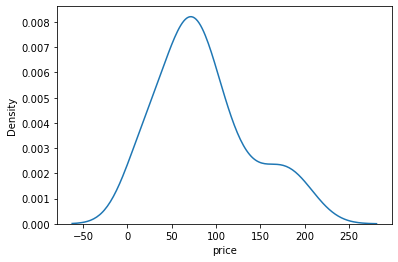

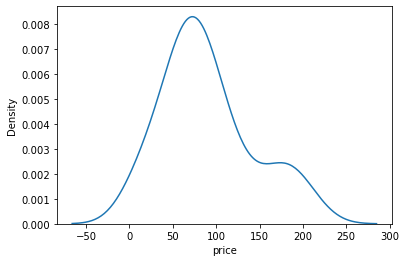

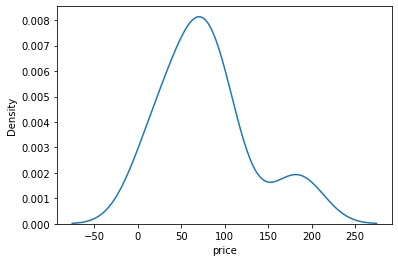

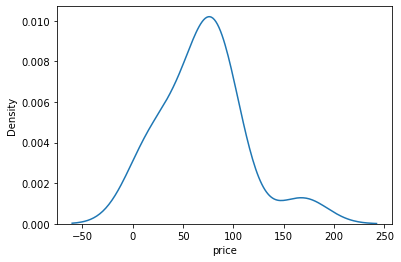

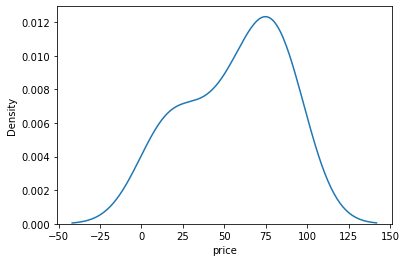

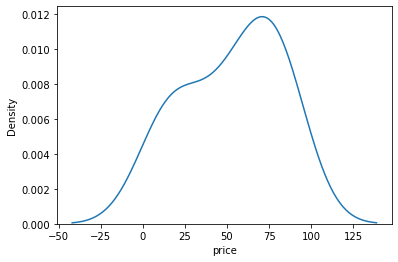

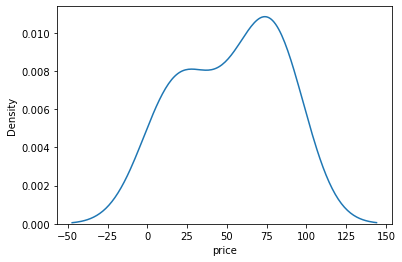

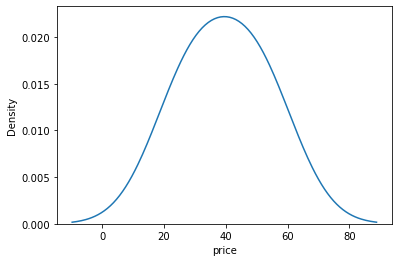

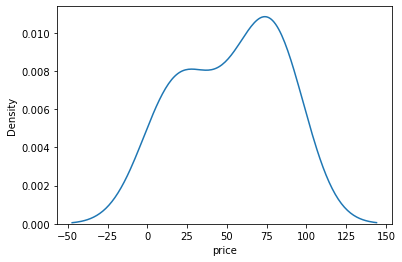

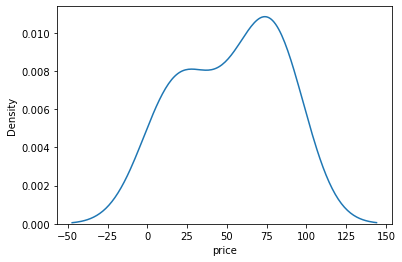

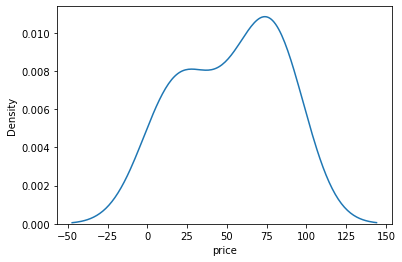

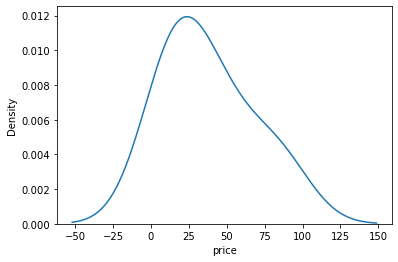

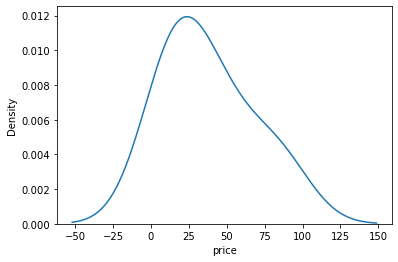

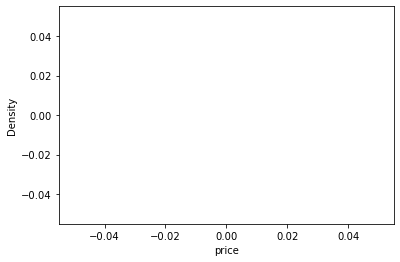

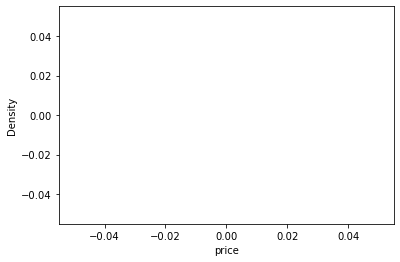

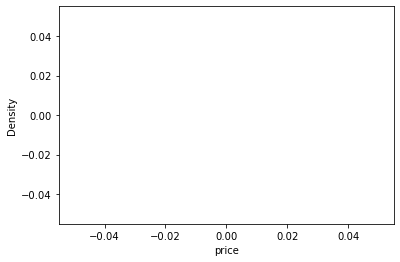

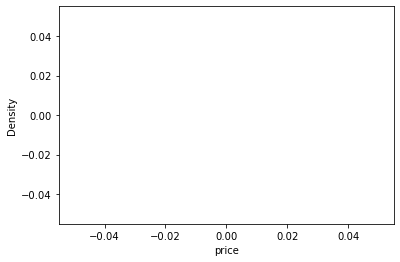

In [36]:
for i in df['payment_sequential'].unique():
    sb.kdeplot(df['price'][df['payment_sequential']==i])
    mp.show()

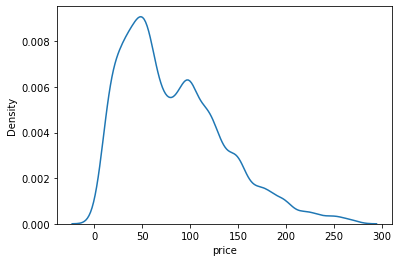

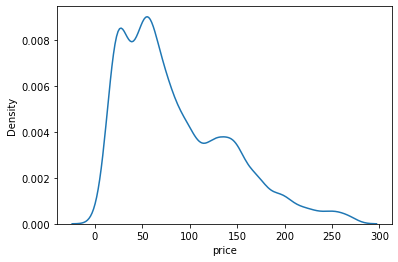

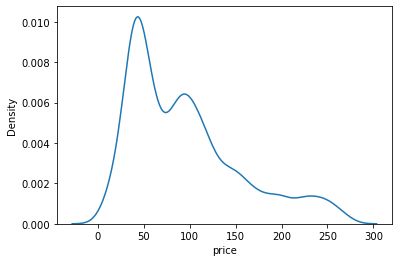

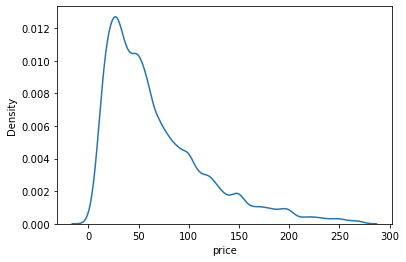

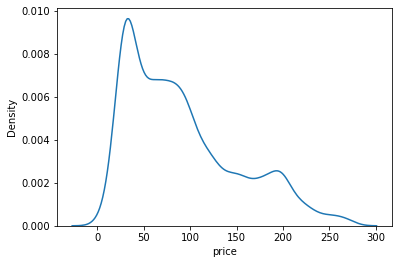

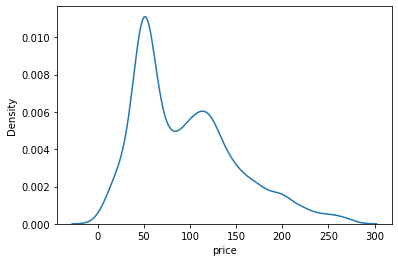

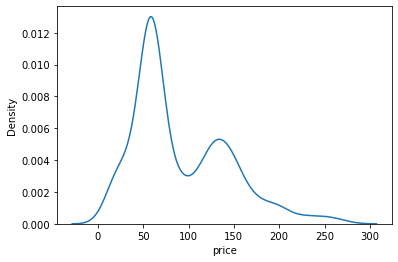

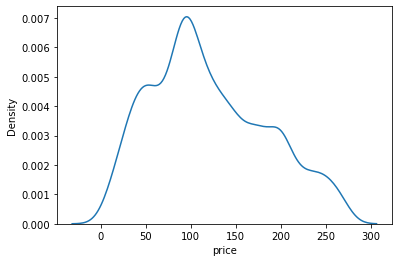

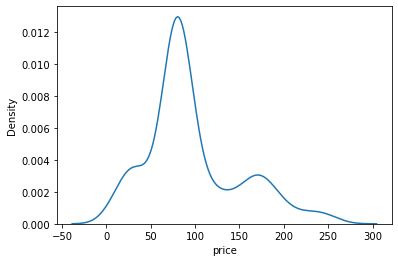

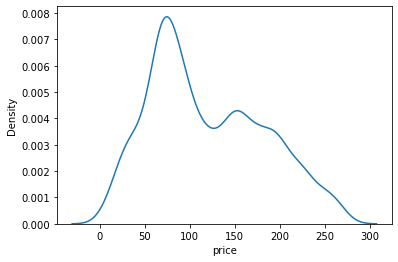

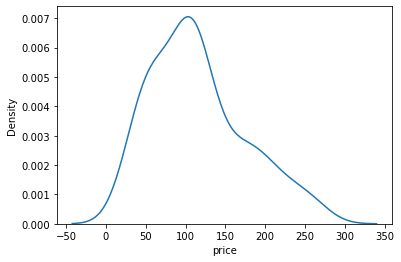

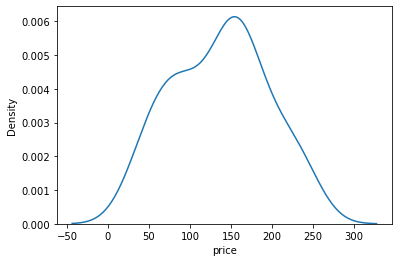

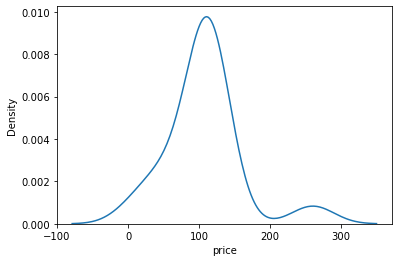

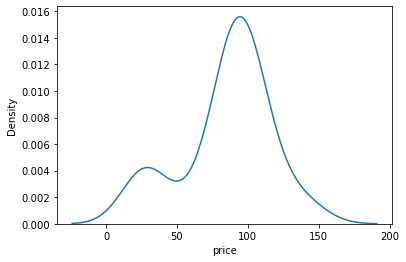

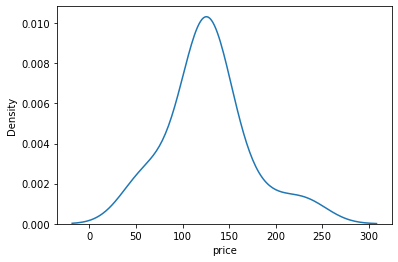

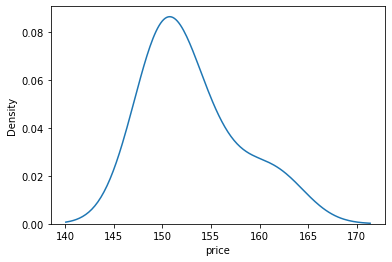

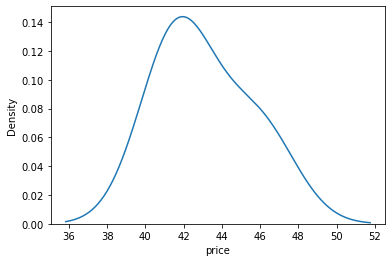

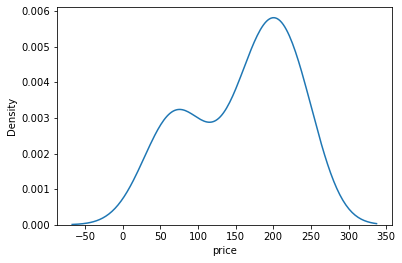

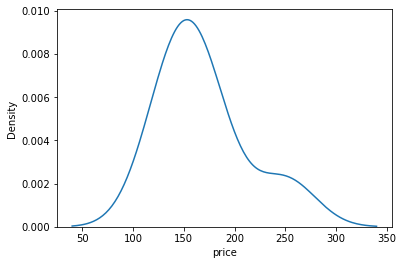

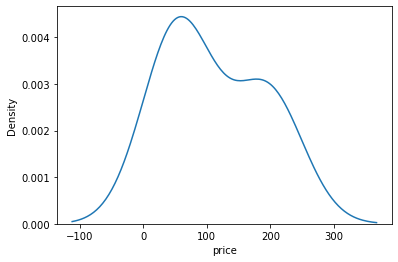

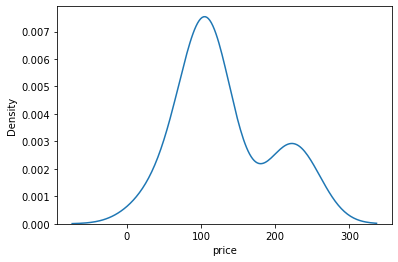

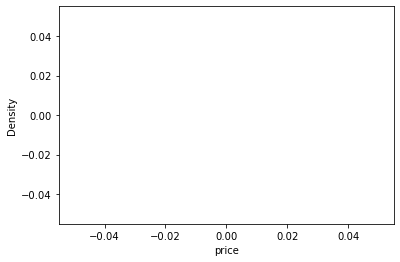

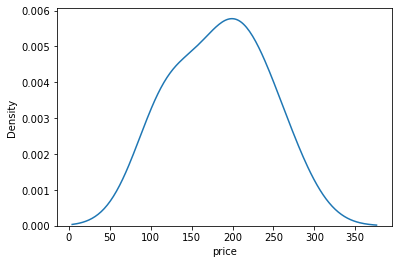

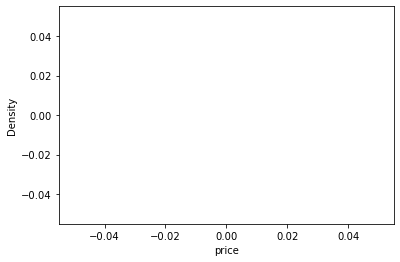

In [100]:
for i in df['payment_installments'].unique():
    sb.kdeplot(df['price'][df['payment_installments']==i])
    mp.show()

In [39]:
#We can notice that there are not much of values for one category.

***Multi-variate Analysis***

<AxesSubplot:>

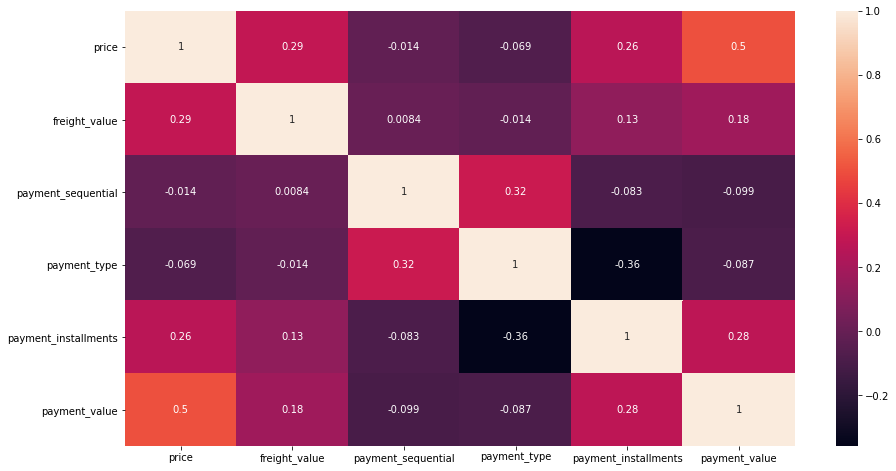

In [40]:
mp.figure(figsize=(15,8))
sb.heatmap(df.corr(),annot=True)

In [41]:
#We can notice that there is no collinearity or very light collinearity between the features.

# **Data Pre-processing**

***Outlier Treatment***

In [42]:
df.columns

Index(['price', 'freight_value', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')

In [43]:
num=df[['freight_value','payment_value']]
num

,freight_value,payment_value
0,13.29,72.19
1,19.93,259.83
2,17.87,216.87
3,12.79,25.78
4,18.14,218.04
...,...,...
101330,34.19,356.76
101331,20.03,139.88
101332,16.95,116.85
101333,8.72,64.71


In [44]:
for col in num.columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    ll=q1-(1.5*iqr)
    ul=q3+(1.5*iqr)

    print(len(df[(df[col]<ll) | (df[col]>ul)]))

5534
4477


**Here we can see that there are 5534 outliers rows in freight_value**

**Here we can see that there are 4477 outliers rows in payment_value**

***We can cap the outliers to not lose the data***

In [46]:
df_cpy=df.copy()

In [47]:
for col in df_cpy[['freight_value','payment_value']]:
    q1 = df_cpy[col].quantile(0.25)
    q3 = df_cpy[col].quantile(0.75)
    iqr = q3-q1
    ll=q1-(1.5*iqr)
    ul=q3+(1.5*iqr)
    
    for ind in df_cpy[col].index:
        if(df_cpy.loc[ind,col] < ll):
            df_cpy.loc[ind,col] = ll
        if(df_cpy.loc[ind,col]>ul):
            df_cpy.loc[ind,col]=ul

<AxesSubplot:xlabel='freight_value'>

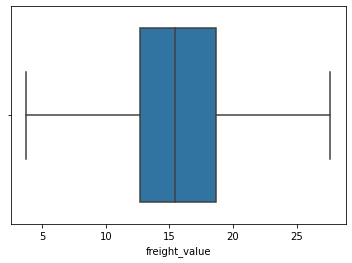

In [48]:
sb.boxplot(df_cpy['freight_value'])

<AxesSubplot:xlabel='payment_value'>

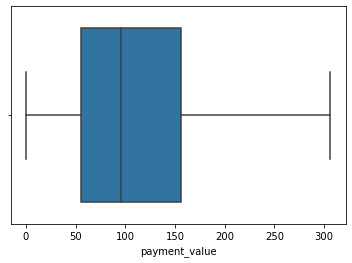

In [49]:
sb.boxplot(df_cpy['payment_value'])

***Null Values Detection***

In [50]:
df_cpy.isnull().sum()

price                   0
freight_value           0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [51]:
#We can notice there are no null values as we have seen in the data info.

In [52]:
x=df_cpy.drop(['price'],1)
y=df_cpy['price']

In [53]:

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = x.columns
    vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

    return(vif)

In [54]:
calc_vif(x)

,variables,VIF
0,freight_value,6.889912
1,payment_sequential,3.761705
2,payment_type,5.037866
3,payment_installments,2.525469
4,payment_value,3.895743


**Scaling**

In [55]:
x=x.copy()
x[['freight_value','payment_value']]=x[['freight_value','payment_value']].apply(zscore)
x

,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,-0.494556,1,1,2,-0.554531
1,0.730097,1,1,3,1.908037
2,0.350159,1,1,5,1.344235
3,-0.586774,1,1,2,-1.163611
4,0.399957,1,1,3,1.359590
...,...,...,...,...,...
101330,2.152095,1,2,1,2.517577
101331,0.748540,1,1,3,0.333826
101332,0.180478,1,1,3,0.031583
101333,-1.337427,1,1,3,-0.652697


**Splitting**

In [90]:
xtr,xt,ytr,yt=train_test_split(x,y,test_size=0.3,random_state=52)

In [91]:
xtr.shape,xt.shape,ytr.shape,yt.shape

((70934, 5), (30401, 5), (70934,), (30401,))

# Model Building

In [56]:
xc=sm.add_constant(x)

In [57]:
basemodel=sm.OLS(y,xc).fit()
basemodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                 2.056e+04
Date:                Sun, 05 Dec 2021   Prob (F-statistic):               0.00
Time:                        11:56:51   Log-Likelihood:            -5.1631e+05
No. Observations:              101335   AIC:                         1.033e+06
Df Residuals:                  101329   BIC:                         1.033e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   70.5737      0.391    180.539      0.000      69.808      71.340
freight_value            6.6185      0.129     51.257      0.000       6.365       6.872
payment_sequential       6.7180      0.192     35.032      0.000       6.342       7.094
payment_type             0.5280      0.214      2.463      0.014       0.108       0.948
payment_installments     0.4535      0.056      8.105      0.000       0.344       0.563
payment_value           37.4781      0.138    271.984      0.000      37.208      37.748
==============================================================================
Omnibus:                     4439.964   Durbin-Watson:                   1.243
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13858.140
Skew:                          -0.136   Prob(JB):                         0.00
Kurtosis:                       4.791   Cond. No.                         13.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
#Target is numeric

In [59]:
#Target is skewed
df_cpy.price.skew()

1.0853288244552386

In [60]:
s,pval=stats.shapiro(basemodel.resid)
print(pval)
if pval>0.05:
    print('Residuals Normal')
else:
    print('Residuals Not normal')

0.0
Residuals Not normal


In [61]:
ypred=basemodel.predict(xc)

In [62]:
from statsmodels.stats.diagnostic import linear_rainbow

s,pva=linear_rainbow(res=basemodel)

In [63]:
if pva>0.05 :

    print('H0: linear')

else:

    print('h1: non-linear')

H0: linear


<AxesSubplot:xlabel='price'>

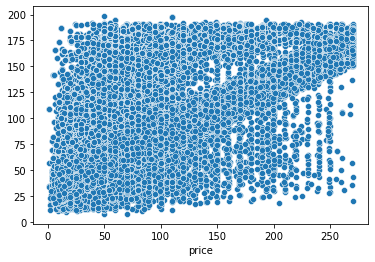

In [64]:
sb.scatterplot(y,ypred)

In [65]:
basemodel.condition_number

13.604244253722628

In [66]:
calc_vif(x)

,variables,VIF
0,freight_value,1.079090
1,payment_sequential,3.664525
2,payment_type,3.375350
3,payment_installments,1.772732
4,payment_value,1.228704


In [67]:
#There is no or very moderate multicollinearity which is negligible

In [68]:
durbin_watson(basemodel.resid)

1.2431383044251625

In [69]:
f,pval,s=gq.het_goldfeldquandt(basemodel.resid,xc)
if pval>=0.05:
    print('Homoscedastic')
else:
    print('Hetroscedastic')

Homoscedastic


**Assumptions**

***Target  numeric - satisfied***

***Normality -  not satisfied***

***Multicollinearity  - condition_no,VIF - Satisfied*** 

***Autocorrelation : near to 2, No Autocorrelation:Satisfied***

***Linearity - satisfied - No pattern Found*** 

***Homoscadasticity - Satisfied***

In [92]:
#Very low r2 score

In [95]:
ypred=basemodel.predict(xc)

In [97]:
rmse=np.sqrt(mean_squared_error(y,ypred))
rmse

39.49397072645259

In [98]:
#Error is also High

In [70]:
r2_scores=[]
adj_r2_scores=[]
rmse_scores=[]

In [71]:
n = x.shape[0]  #no_of_rows
p = x.shape[1]  #no_of_columns  

In [72]:
def build_model(mod):
    models=mod.fit(x,y)
    k  = KFold(n_splits=5,shuffle=True, random_state=10)
    scores_rmse = cross_val_score(mod,x,y,cv=k,scoring='neg_root_mean_squared_error')
    scores_r2 = cross_val_score(mod,x,y,cv=k,scoring='r2')
    r2_scores.append(scores_r2.mean())
    adj_r2_scores.append(1-(1-(scores_r2.mean()))*(n-1)/(n-p-1))
    rmse_scores.append(np.abs(scores_rmse.mean()))
    print('Rsquared:',scores_r2.mean())
    print('Adjusted_r2:',(1-(1-(scores_r2.mean()))*(n-1)/(n-p-1)))
    print('RMSE:',np.abs(scores_rmse.mean()))

In [73]:
build_model(LinearRegression())

Rsquared: 0.5034593369523288
Adjusted_r2: 0.5034348355429077
RMSE: 39.497393704985654


In [74]:
build_model(KNeighborsRegressor())

Rsquared: 0.6718227398975123
Adjusted_r2: 0.6718065462481078
RMSE: 32.10990036676002


In [75]:
build_model(DecisionTreeRegressor())

Rsquared: 0.7654733078779563
Adjusted_r2: 0.7654617353423484
RMSE: 27.209180202356514


In [76]:
build_model(RandomForestRegressor())

Rsquared: 0.845039711785833
Adjusted_r2: 0.8450320653919964
RMSE: 22.06268149876258


In [77]:
build_model(XGBRegressor())

Rsquared: 0.7487301699839268
Adjusted_r2: 0.7487177712713167
RMSE: 28.094832216978908


In [78]:
build_model(AdaBoostRegressor())

Rsquared: 0.5324757502057897
Adjusted_r2: 0.5324526805885137
RMSE: 38.01696648644874


In [79]:
build_model(GradientBoostingRegressor())

Rsquared: 0.6298821985858141
Adjusted_r2: 0.629863935413306
RMSE: 34.10026749463741


**We can see that Linear model is not working well.It may be due to the normality assumption was not satisfied**

**In Non - linear models, we can see that both rmse and r2 scores are comparitively good than other models.**

In [80]:
rf_=RandomForestRegressor()
rf_.fit(x,y)
k  = KFold(n_splits=5,shuffle=True, random_state=10)
scores_rmse = cross_val_score(rf_,x,y,cv=k,scoring='neg_root_mean_squared_error')
scores_r2 = cross_val_score(rf_,x,y,cv=k,scoring='r2')
print(scores_r2)
print(scores_rmse)

[0.84398912 0.84204879 0.84564162 0.84083248 0.85199494]
[-22.09723952 -22.15880381 -21.89958558 -22.41868099 -21.67952352]


In [81]:
features_df = pd.DataFrame()
features_df['Importance'] = rf_.feature_importances_
features_df.index = x.columns

features_df = features_df.sort_values('Importance',ascending=False)
features_df

,Importance
payment_value,0.720338
freight_value,0.225214
payment_installments,0.030301
payment_sequential,0.015382
payment_type,0.008765


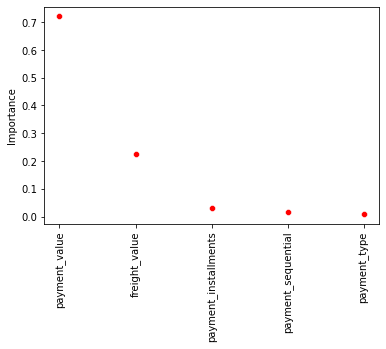

In [82]:
sb.scatterplot(x=features_df.index,y=features_df['Importance']
            ,color='red')
mp.ylabel('Importance')
mp.xticks(rotation=90);

**Here, the importance of features in building the model**

**Most Important feature for building this random forest model is Payment value**

In [83]:
Comparitive_Scores=pd.DataFrame({'Models':
                            ['LinearRegression','KNeighborsRegressor','DecisionTreeRegressor'
                            ,'RandomForestRegressor','XGBRegressor','AdaBoostRegressor',
                             'GradientBoostingRegressor'],
                                 'R2_Scores':r2_scores,'Adjusted_r2':adj_r2_scores,
                               'Root_Mean_Squared_Error':rmse_scores})

In [84]:
Comparitive_Scores=Comparitive_Scores.set_index('Models')

In [85]:
Comparitive_Scores

,R2_Scores,Adjusted_r2,Root_Mean_Squared_Error
Models,,,
LinearRegression,0.503459,0.503435,39.497394
KNeighborsRegressor,0.671823,0.671807,32.109900
DecisionTreeRegressor,0.765473,0.765462,27.209180
RandomForestRegressor,0.845040,0.845032,22.062681
XGBRegressor,0.748730,0.748718,28.094832
AdaBoostRegressor,0.532476,0.532453,38.016966
GradientBoostingRegressor,0.629882,0.629864,34.100267


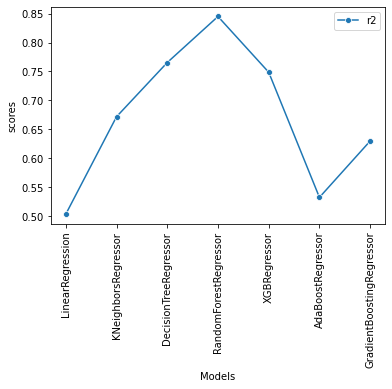

In [86]:
sb.lineplot(x=Comparitive_Scores.index,y=Comparitive_Scores['R2_Scores']
            ,marker='o',label='r2')
mp.ylabel('scores')
mp.xticks(rotation=90);

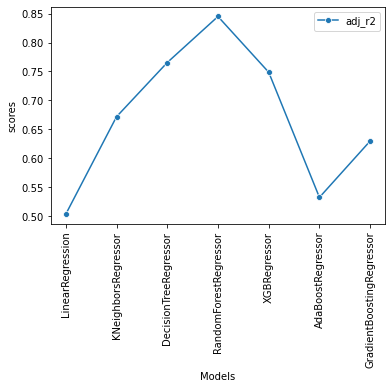

In [87]:
sb.lineplot(x=Comparitive_Scores.index,y=Comparitive_Scores['Adjusted_r2'],
            marker='o',label='adj_r2')
mp.ylabel('scores')
mp.xticks(rotation=90);

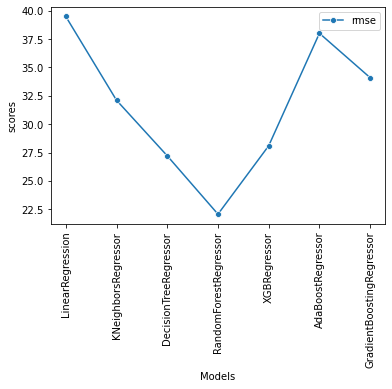

In [88]:
sb.lineplot(x=Comparitive_Scores.index,y=Comparitive_Scores['Root_Mean_Squared_Error'],
            marker='o',label='rmse')
mp.ylabel('scores')
mp.xticks(rotation=90);

**We can notice that Random Forest Regressor has given us result which is better in explaining of
variation in the Target variable 'price'**

**Here, Random Forest Regressor has 0.845 which can be said as this model is explaining 84.5% of 
variation in Target 'Price'**

**As we can see Adjusted r2 is similar to r2. That shows all the features are contributing
in explaining the model.**

**We can also notice that the square root of errors are comparitively less than other non linear 
models**

**So, we can conclude that Random Forest is better model.**


**We can do hyper parameter tuning to further increase the performance of the model**